# Predicting active regulatory regions
## Summary
In this lesson we will practice with the preparation of the active regulatory regions dataset (retrieving data, one-hot encoding data, quick dataset analysis, preparation of the labels for training) and used the data for training a simple MLP and CNN.

## Code requirements
We will use the python packages that are listed in the file [`requirements.txt` in the main directory of the course repository](https://github.com/LucaCappelletti94/Master-in-Bioinformatics-and-Functional-genomics/blob/master/requirements.txt). To automatically install every package, just run the following from within the root of the repository:
```bash
python -m pip install --upgrade -r requirements.txt
```

## The data
We will use the [data from the DECRES library](https://github.com/yifeng-li/DECRES), a subset of the one used within the paper [Genome-wide prediction of cis-regulatory regions using supervised deep learning methods](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2187-1). The dataset is a lot smaller than the one used within the paper, so we will not expect to achieve similar results. We will use, in particular, the sanitized version present within the directory where you have found this notebook.

Of the original cell lines, we consider only [GM12878](https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=NA12878&Product=CC).

Before getting started, we will take notice of the contents of the dataset.

## The epigenomic data
The [epigenomic](https://en.wikipedia.org/wiki/Epigenomics) data file `"GM12878/data.csv"` is a file containing a number of features on the genetic expression of the cells of this specific cell line.

In [1]:
import pandas as pd
epigenomic = pd.read_csv(
    "GM12878/data.csv", # The csv file path
    index_col=0 # A parameter telling pandas to use the first column as index
)

Let's start by displaying the data and then we will try to answer the following questions:

- There are any `NaN` values?
- Any column is constant or has an extremely low variance?
- Does any column strongly covariate with another?

In [2]:
epigenomic

,ATF2,ATF3,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,BRCA1,C-FOS(FOS),C-MYC(MYC),...,USF1,USF2,WHIP(WRNIP1),YY1,ZBTB33,ZEB1,ZNF143,ZNF274,ZNF384,ZZZ3
0,0.00,0.00,7.46,3.67,16.20,20.02,13.52,1.00,2.31,3.82,...,10.44,18.48,1.78,0.15,4.94,15.50,4.21,2.11,0.00,3.45
1,0.00,0.00,3.07,3.54,1.17,1.06,26.92,1.52,1.70,0.27,...,1.94,7.31,1.01,0.00,3.33,5.17,3.01,1.31,0.00,2.64
2,0.00,0.00,3.45,0.86,2.21,3.46,39.33,3.70,1.63,2.01,...,7.00,8.70,7.60,0.24,11.26,11.26,4.16,3.91,0.09,1.64
3,0.00,0.51,8.03,1.77,3.75,4.51,31.47,2.58,2.55,2.01,...,8.98,6.21,9.10,0.14,2.63,5.84,1.59,3.34,0.00,0.76
4,0.00,2.52,2.89,1.15,1.06,2.39,28.08,4.48,2.32,0.83,...,7.33,5.49,11.24,0.05,5.33,7.61,2.12,3.83,0.00,1.04
5,0.00,0.84,11.28,0.71,2.66,4.74,20.36,3.44,3.45,1.80,...,7.20,7.53,16.18,0.31,15.83,7.16,9.07,4.01,0.14,2.12
6,0.00,0.00,2.05,1.72,0.87,0.79,47.21,1.29,1.04,1.03,...,2.41,2.56,1.29,0.71,1.34,4.87,2.95,1.06,0.00,1.02
7,0.38,2.08,21.09,0.25,40.49,21.86,22.20,5.28,0.56,3.09,...,8.65,9.45,9.02,0.31,1.88,6.31,1.25,3.47,4.33,1.25
8,8.49,4.15,2.41,0.23,2.06,2.52,4.44,3.01,0.65,1.84,...,1.53,2.27,1.47,0.39,0.60,1.41,2.14,2.10,0.53,0.55
9,0.00,2.83,4.08,0.78,4.42,2.64,13.53,4.13,0.40,0.23,...,2.18,1.51,3.50,0.33,0.51,2.71,0.18,0.29,0.12,0.31


### Checking for NaN values
To check if there are any NaN values we use the [pandas method `pd.isna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), which returns a boolean value for each value of the dataframe. Then, we will use [np.any](https://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html) to check for any `NaN` value. If detected, we would have to either choose a way to fill the value or delete the column / row with the value.

In [3]:
import numpy as np
np.any(pd.isna(epigenomic).values)

False

We are in luck! No `NaN` values in sight.

### Checking for columns with low variance
To check if any column has a very low variance we will start by computing the dataframe's columns variance and we will normalize them by their mean. Then, after choosing a sensible threshold (for example $0.1$), we will check if any of the column has variance that. We could consider to remove such columns, as they might just slow down the training without contributing much informations.

In [4]:
np.any(epigenomic.var() / epigenomic.mean() < 0.1)

False

Nessuna colonna ha varianza estremamente bassa!

### Checking for covariances
To check if any columns pair has an high [Pearson coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) we calculate the coefficient and then we check for correlations higher than $0.95$, ignoring the main diagonal. If we were to find extremely correlated columns we could remove one of them, preferebly the one with minor variance to remove redoundant data.

In [5]:
pearson = (epigenomic.corr().abs().values > 0.95).astype(float)
pearson[np.tril_indices(pearson.shape[0])] = np.nan
np.nansum(pearson)

0.0

Nessuna colonna risulta fortemente covariante con un'altra.

## The sequence data
The sequence data file `"GM12878/regions.bed"` is a file [bed file](https://genome.ucsc.edu/FAQ/FAQformat.html) that contains the delimiters for nucleotides of size $200$ in our case. We will start by extracting the nucleotides sequence from the genome: as first step we will download [the genome `"hg19"`](https://www.ncbi.nlm.nih.gov/assembly/GCF_000001405.13/).

In [6]:
from ucsc_genomes_downloader import download_genome
download_genome("hg19")

Then, now, we will use [`bedtools`](https://bedtools.readthedocs.io/en/latest/content/installation.html). On linux you can install it by running:
```bash
sudo apt-get install bedtools
```

In [7]:
import subprocess
subprocess.run([
    "fastaFromBed",
    "-fi",
    "hg19.fa",
    "-bed",
    "GM12878/regions.bed",
    "-fo",
    "GM12878/expanded_regions.fa"
])

CompletedProcess(args=['fastaFromBed', '-fi', 'hg19.fa', '-bed', 'GM12878/regions.bed', '-fo', 'GM12878/expanded_regions.fa'], returncode=0)

Now we have within the file `"GM12878/expanded_regions.fa"` the expanded nucleotides sequences.

## Preparing the epigenomic data for training
To prepare the emigenomic data we proceed with a [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), fitting it on the training data and normalizing both training and testing epigenomic data, splitting them using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.

In [8]:
from sklearn.model_selection import train_test_split
epi_train, epi_test = train_test_split(epigenomic, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(epi_train)
epi_train, epi_test = scaler.transform(epi_train), scaler.transform(epi_test)

This normalization reduces the ranges of the training set from $0$ to $1$, and we *hope* that the training set is general enough to reduce also the testing set within this range. Since our dataset isn't very big, it could happen that we might not be able to normalize in the same range also the test set:

In [10]:
epi_train.min(), epi_train.max(), epi_test.min(), epi_test.max()

(0.0, 1.0, 0.0, 1.6409340659340659)

## Preparing the sequence data for training
To prepare the sequence data for training, we have to [one-hot](https://en.wikipedia.org/wiki/One-hot) encode the sequences. Afterwards, we will proceed to split it into training and testing set.

In [11]:
from fasta_one_hot_encoder import FastaOneHotEncoder
FastaOneHotEncoder(
    nucleotides="acgtn",
    kmers_length=1,
    lower=True,
    sparse=False
).transform_to_df("GM12878/expanded_regions.fa").to_csv("GM12878/encoded_regions.fa")

In [12]:
seq_train, seq_test = train_test_split(
    pd.read_csv("GM12878/encoded_regions.fa", index_col=0).values.reshape(-1, 200, 5),
    test_size=0.3,
    random_state=42
)

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Preparing the labels for training

The dataset we are working on was prepared with a number of tasks, in particular we will work on ditinguishing **Active enhancers vs Active promoters** *(A-E vs A-P)*.

In [13]:
class_train, class_test = train_test_split(
    pd.read_csv("GM12878/classes.csv", index_col=False).values,
    test_size=0.3,
    random_state=42
)

First of all, we have to drop the labels that do not match any class of interest. We begin by obtaining the mask of the correct labels:

In [14]:
classes = ["A-E", "A-P"]
class_train
train_mask = np.isin(class_train.ravel(), classes)
test_mask = np.isin(class_test.ravel(), classes)

In [15]:
epi_train, epi_test = epi_train[train_mask], epi_test[test_mask]
seq_train, seq_test = seq_train[train_mask], seq_test[test_mask]
class_train, class_test = class_train[train_mask], class_test[test_mask]

In [16]:
class_train = class_train=="A-E"
class_test = class_test=="A-E"

## Preparing an MLP

In [17]:
from keras import Sequential
from keras.layers import Dense, Dropout
from extra_keras_utils import set_seed
import silence_tensorflow
import extra_keras_metrics

set_seed(42)

mlp = Sequential([
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])

mlp.compile(
    optimizer="nadam",
    loss="binary_crossentropy",
    metrics=["auprc", "auroc"]
)

Using TensorFlow backend.


## Training the MLP
We will use in particular the [`EarlyStopping`](https://keras.io/callbacks/#earlystopping) method to stop the training when the `"auprc"` metric no longer increses.

In [18]:
from environments_utils import is_notebook
from keras.callbacks import EarlyStopping
from keras_tqdm import TQDMCallback, TQDMNotebookCallback
ktqdm = TQDMNotebookCallback if is_notebook() else TQDMCallback

mlp_history = mlp.fit(
    epi_train, class_train,
    epochs=200,
    shuffle=True,
    batch_size=1000,
    verbose=0,
    validation_data=(epi_test, class_test),
    callbacks=[
        ktqdm(),
        EarlyStopping(
            monitor="auprc",
            min_delta=0.001,
            patience=20,
            mode="max",
            restore_best_weights=True
        )
    ]
).history

In [19]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt
plot_history(mlp_history)
plt.show()

<Figure size 1500x500 with 3 Axes>

## Preparing a CNN

In [20]:
from keras.layers import Conv1D, MaxPool1D, Flatten

set_seed(42)

cnn = Sequential([
    Conv1D(64, 5, activation="relu"),
    MaxPool1D(2),
    Conv1D(64, 5, activation="relu"),
    MaxPool1D(2),
    Dropout(0.1),
    Conv1D(32, 5, activation="relu"),
    MaxPool1D(2),
    Conv1D(32, 5, activation="relu"),
    MaxPool1D(2),
    Dropout(0.1),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])

cnn.compile(
    optimizer="nadam",
    loss="binary_crossentropy",
    metrics=["auprc", "auroc"]
)

## Training the CNN

In [21]:
cnn_history = cnn.fit(
    seq_train, class_train,
    epochs=200,
    shuffle=True,
    batch_size=1000,
    verbose=0,
    validation_data=(seq_test, class_test),
    callbacks=[
        ktqdm(),
        EarlyStopping(
            monitor="auprc",
            min_delta=0.001,
            patience=20,
            mode="max",
            restore_best_weights=True
        )
    ]
).history

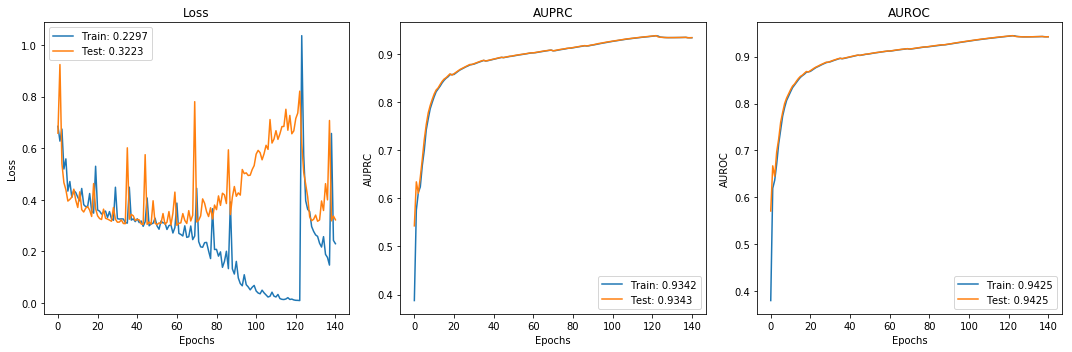

In [22]:
plot_history(cnn_history)
plt.show()